## 卷积层
卷积层是 CNN 最重要的组成部分：

第一个卷积层的神经元，不是与图片中的每个像素点都连接，而是只连着局部感受野的像素（见图 14-2）。同理，第二个卷积层中的每个神经元也只是连着第一层中一个小方形内的神经元。`这种架构可以让第一个隐藏层聚焦于小的低级特征，然后在下一层组成大而高级的特征，等等。这种层级式的结构在真实世界的图片很常见，这是 CNN 能在图片识别上取得如此成功的原因之一。`<br>
<img src='https://hands1ml.apachecn.org/img/742bbcc20165cd543798934f27e16a25.png'><br>
笔记：我们目前所学过的所有多层神经网络的层，都是由一长串神经元组成的，所以在将图片输入给神经网络之前，必须将图片打平成 1D 的。`在 CNN 中，每个层都是 2D 的，更容易将神经元和输入做匹配。`

### 感受野
#### 设置感受野的高度和宽度
位于给定层第i行、第j列的神经元，和前一层的第i行到第i + fh – 1行、第j列到第j + fw – 1列的输出相连，f[h]和f[w]是感受野的高度和宽度（见图 14-3）。为了让卷积层能和前一层有相同的高度和宽度，通常给输入加上 0，见图，这被称为零填充（zero padding）。<br>
<img src='https://hands1ml.apachecn.org/img/82618679ef99649bba8f9407ce01dce0.png'><br>


#### 设置感受野的步长
`也可以通过间隔感受野，将大输入层和小卷积层连接起来，见图 14-4。这么做可以极大降低模型的计算复杂度。`一个感受野到下一个感受野的平移距离称为步长。在图中，5 × 7的输入层（加上零填充），连接着一个3 × 4的层，使用3 × 3的感受野，步长是 2（这个例子中，宽和高的步长都是 2，但也可以不同）。位于上层第i行、第j列的神经元，连接着前一层的第i × sh到i × sh + fh – 1行、第j × sw到j × sw + fw – 1列的神经元的输出，s[h]和s[w]分别是垂直和水平步长。<br>
<img src='https://hands1ml.apachecn.org/img/058f0c3ad21d6f25e14dadfb26373faf.png'><br>

### 过滤器(卷积核，即一个神经元的权重)
`神经元的权重（称为权重，或卷积核）可以表示为感受野大小的图片。`例如，图 14-5 展示了两套可能的权重（称为权重，或卷积核）。第一个是黑色的方形，中央有垂直白线（7 × 7的矩阵，除了中间的竖线都是 1，其它地方是 0）；使用这个矩阵，神经元只能注意到中间的垂直线（因为其它地方都乘以 0 了）。第二个过滤器也是黑色的方形，但是中间是水平的白线。使用这个权重的神经元只会注意中间的白色水平线。

如果卷积层的所有神经元使用同样的垂直过滤器（和同样的偏置项），给神经网络输入图 14-5 中最底下的图片，卷积层输出的是左上的图片。可以看到，图中垂直的白线得到了加强，其余部分变模糊了。相似的，右上的图是所有神经元都是用水平线过滤器的结果，水平的白线加强了，其余模糊了。`因此，一层的全部神经元都用一个过滤器，就能输出一个特征映射（feature map），特征映射可以高亮图片中最为激活过滤器的区域。`当然，`不用手动定义过滤器：卷积层在训练中可以自动学习对任务最有用的过滤器，上面的层则可以将简单图案组合为复杂图案。`<br>
<img src='https://hands1ml.apachecn.org/img/9e4747d2c0ff968eaa1b365b686a336b.png'><br>

### 堆叠多个特征映射
简单起见，前面都是将每个卷积层的输出用 2D 层来表示的，`但真实的卷积层可能有多个过滤器（过滤器数量由你确定），每个过滤器会输出一个特征映射，所以表示成 3D 更准确（见图 14-6）。`每个特征映射的每个像素有一个神经元，同一特征映射中的所有神经元有同样的参数（即，同样的权重和偏置项）。不同特征映射的神经元的参数不同。神经元的感受野和之前描述的相同，但扩展到了前面所有的特征映射。总而言之，`一个卷积层同时对输入数据应用多个可训练过滤器，使其可以检测出输入的任何地方的多个特征。`

笔记：`同一特征映射中的所有神经元共享一套参数，极大地减少了模型的参数量。`
`当 CNN 认识了一个位置的图案，就可以在任何其它位置识别出来。`相反的，当常规 DNN 学会一个图案，只能在特定位置识别出来。

输入图像也是有多个子层构成的：每个颜色通道，一个子层。通常是三个：红，绿，蓝（RGB）。灰度图只有一个通道，但有些图可能有多个通道 —— 例如，卫星图片可以捕捉到更多的光谱频率（比如红外线）。<br>
<img src='https://hands1ml.apachecn.org/img/e3e8c55fa98dd5af8dbe24fcd08d7dca.png'><br>

特别的，`位于卷积层l的特征映射k的第i行、第j列的神经元，它连接的是前一层l-1的i × sh到i × sh + fh – 1行、j × sw到j × sw + fw – 1列的所有特征映射。`不同特征映射中，位于相同i行、j列的神经元，连接着前一层相同的神经元。

等式 14-1 用一个大等式总结了前面的知识：如何计算卷积层中给定神经元的输出。因为索引过多，这个等式不太好看，它所做的其实就是计算所有输入的加权和，再加上偏置项。<br>
<img src='https://hands1ml.apachecn.org/img/4563bad38f502e5afb7561da8c7917a5.png'><br>
在这个等式中：

z[i, j, k]是卷积层l中第i行、第j列、特征映射k的输出。

s[h]和s[w]是垂直和水平步长，f[h]和f[w]是感受野的高和宽，f[n']是前一层l-1的特征映射数。

x[i', j', k']是卷积层l-1中第i'行、第j'列、特征映射k'的输出（如果前一层是输入层，则为通道k'）。

b[k]是特征映射k的偏置项。可以将其想象成一个旋钮，可以调节特征映射 k 的明亮度。

w[u, v, k′ ,k]（其实就是w[u, v, k]，与k′无关）是层l的特征映射k的任意神经元，和位于行u、列v（相对于神经元的感受野）、特征映射k'的输入，两者之间的连接权重。

### 代码实现：TensorFlow 实现
`在 TensorFlow 中，每张输入图片通常都是用形状为[高度，宽度，通道]的 3D 张量表示的。一个小批次则为 4D 张量，形状是[批次大小，高度，宽度，通道]。卷积层的权重是 4D 张量，形状是[f[h], f[w], f[n'], f[n]]。卷积层的偏置项是 1D 张量，形状是[f[n]]。`

看一个简单的例子。下面的代码使用 Scikit-Learn 的load_sample_image()加载了两张图片，一张是中国的寺庙，另一张是花，创建了两个过滤器，应用到了两张图片上，最后展示了一张特征映射：

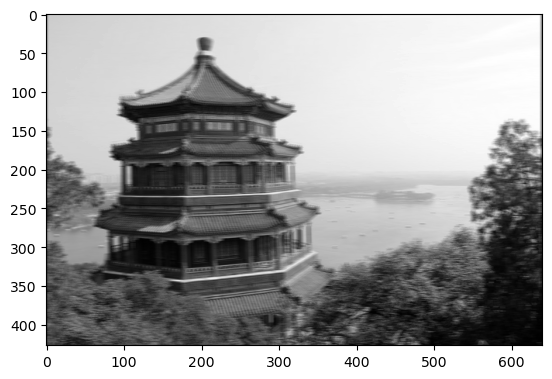

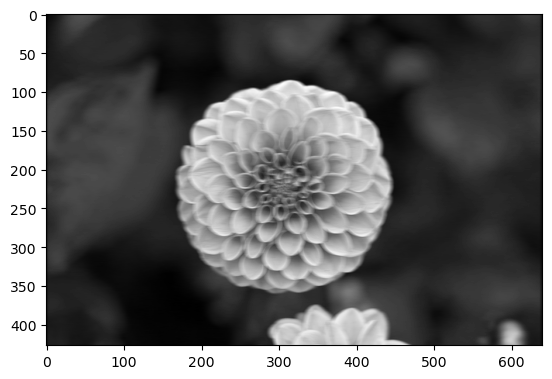

In [1]:
from sklearn.datasets import load_sample_image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 加载样本图片，.jpg格式的shape为height, width, channels
# 每个颜色通道的像素强度是用 0 到 255 来表示的，所以直接除以 255，将其缩放到区间 0 到 1 内。
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# 创建两个过滤器
# 然后创建了两个7 × 7的过滤器（一个有垂直正中白线，另一个有水平正中白线）
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # 垂直线
filters[3, :, :, 1] = 1  # 水平线

# 使用tf.nn.conv2d()函数，将过滤器应用到两张图片上。
# 这个例子中使用了零填充（padding="same"），步长是 1。
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

# 最后，画出一个特征映射（相似与图 14-5 中的右上图）。
plt.imshow(outputs[0, :, :, 1], cmap="gray") # 画出第 1 张图的第 2 个特征映射
plt.show()
plt.imshow(outputs[1, :, :, 1], cmap="gray") # 画出第 2 张图的第 2 个特征映射
plt.show()

`tf.nn.conv2d()函数`这一行，再多说说：

images是一个输入的小批次（4D 张量）。batch_size, height, width, channels = images.shape

filters是过滤器的集合（也是 4D 张量）。shape=(f[h], f[w], channels, f[n])，f[h]和f[w]是感受野的高和宽，f[n]是特征映射数/通道数，[filter_height, filter_width, in_channels, out_channels]

strides等于 1，也可以是包含 4 个元素的 1D 数组，中间的两个元素是垂直和水平步长（s[h]和s[w]），第一个和最后一个元素现在必须是 1。以后可以用来指定批次步长（跳过实例）和通道步长（跳过前一层的特征映射或通道）。

padding必须是"same"或"valid"：<br>
如果设为"same"，卷积层会使用零填充。输出的大小是输入神经元的数量除以步长，再取整。例如：如果输入大小是 13，步长是 5（见图 14-7），则输出大小是 3（13 / 5 = 2.6，再向上圆整为 3），零填充尽量在输入上平均添加。当strides=1时，层的输出会和输入有相同的空间维度（宽和高），这就是same的来历。<br>
如果设为"valid"，卷积层就不使用零填充，取决于步长，可能会忽略图片的输入图片的底部或右侧的行和列，见图 14-7（简单举例，只是显示了水平维度）。这意味着每个神经元的感受野位于严格确定的图片中的位置（不会越界），这就是valid的来历。<br>
<img src='https://hands1ml.apachecn.org/img/176addd6633ed6e883b3c6dc1a8d1569.png'><br>

这个例子中，我们手动定义了过滤器，'但在真正的 CNN 中，一般将过滤器定义为可以训练的变量，好让神经网络学习哪个过滤器的效果最好。'使用keras.layers.Conv2D层：

这段代码创建了一个有 32 个过滤器的Conv2D层，每个过滤器的形状是3 × 3，步长为 1（水平垂直都是 1），和"same"填充，输出使用 ReLU 激活函数。`
`和以前一样，可以使用交叉验证来找到合适的超参数值，但很耗时间。后面会讨论常见的 CNN 架构，可以告诉你如何挑选超参数的值。

In [2]:
import keras
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="same", activation="relu")

### 内存需求
CNN 的另一个问题是卷积层需要很高的内存。特别是在训练时，因为反向传播需要所有前向传播的中间值。

比如，一个有5 × 5个过滤器的卷积层，输出 200 个特征映射，大小为150 × 100，步长为 1，零填充。如果输入是150 × 100的 RGB 图片（三通道），则参数总数是(5 × 5 × 3 + 1) × 200 = 15200，加 1 是考虑偏置项。相对于全连接层，参数少很多了。但是 200 个特征映射，每个都包含150 × 100个神经元，每个神经元都需要计算5 × 5 × 3 = 75个输入的权重和：总共是 2.25 亿个浮点数乘法运算。虽然比全连接层少点，但也很耗费算力。`另外，如果特征映射用的是 32 位浮点数，则卷积层输出要占用200 × 150 × 100 × 32 = 96百万比特（12MB）的内存。`这仅仅是一个实例，如果训练批次有 100 个实例，则要使用 1.2 GB 的内存。

在做推断时（即，对新实例做预测），下一层计算完，前一层占用的内存就可以释放掉内存，所以只需要两个连续层的内存就够了。但在训练时，前向传播期间的所有结果都要保存下来以为反向传播使用，所以消耗的内存是所有层的内存占用总和。

提示：如果因为内存不够发生训练终端，可以降低批次大小。另外，可以使用步长降低纬度，或去掉几层。或者，你可以使用 16 位浮点数，而不是 32 位浮点数。或者，可以将 CNN 分布在多台设备上。

接下来，看看 CNN 的第二个组成部分：池化层。

## 池化层
### 原理
明白卷积层的原理了，池化层就容易多了。`池化层的目的是对输入图片做降采样（即，收缩），以降低计算负载、内存消耗和参数的数量（降低过拟合）。`

和卷积层一样，池化层中的每个神经元也是之和前一层的感受野里的有限个神经元相连。和前面一样，必须定义感受野的大小、步长和填充类型。`但是，池化神经元没有权重，它所要做的是使用聚合函数，比如最大或平均，对输入做聚合。`图 14-8 展示了最为常用的最大池化层。在这个例子中，使用了一个2 × 2的池化核，步长为 2，没有填充。只有感受野中的最大值才能进入下一层，其它的就丢弃了。例如，在图 14-8 左下角的感受野中，输入值是 1、5、3、2，所以只有最大值 5 进入了下一层。因为步长是 2，输出图的高度和宽度是输入图的一半（因为没有用填充，向下圆整）。<br>
<img src='https://hands1ml.apachecn.org/img/11350c8af71a04bfece796ad9c622220.png'><br>
笔记：池化层通常独立工作在每个通道上，所以输出深度和输入深度相同。

`除了可以减少计算、内存消耗、参数数量，最大池化层还可以带来对小偏移的不变性(即平移不变性)，`见图 14-9。假设亮像素比暗像素的值小，用2 × 2核、步长为 2 的最大池化层处理三张图（A、B、C）。图 B 和 C 的图案与 A 相同，只是分别向右移动了一个和两个像素。可以看到，A、B 经过池化层处理后的结果相同，这就是所谓的平移不变性。对于图片 C，输出有所不同：向右偏移了一个像素（但仍然有 50% 没变）。`在 CNN 中每隔几层就插入一个最大池化层，可以带来更大程度的平移不变性。另外，最大池化层还能带来一定程度的旋转不变性和缩放不变性。当预测不需要考虑平移、旋转和缩放时，比如分类任务，不变性可以有一定益处。`<br>
<img src='https://hands1ml.apachecn.org/img/5979b04b6b1410e6023c452c38561cdb.png'><br>
但是，最大池化层也有缺点。`首先，池化层破坏了信息`：即使感受野的核是2 × 2，步长是 2，输出在两个方向上都损失了一半，总共损失了 75% 的信息。`对于某些任务，不变性不可取。比如语义分割（将像素按照对象分类）`：如果输入图片向右平移了一个像素，输出也应该向右平移一个像素。此时强调的就是等价：输入发生小变化，则输出也要有对应的小变化。

### 代码实现——TensorFlow 实现
用 TensorFlow 实现最大池化层很简单。

平均池化层和最大池化层很相似，但计算的是感受野的平均值。平均池化层在过去很流行，但最近人们使用最大池化层更多，因为最大池化层的效果更好。初看很奇怪，因为计算平均值比最大值损失的信息要少。`但是从反面看，最大值保留了最强特征，去除了无意义的特征，可以让下一层获得更清楚的信息。另外，最大池化层提供了更强的平移不变性，所需计算也更少。`

In [ ]:
# 下面的代码实现了最大池化层，核是2 × 2。步长默认等于核的大小，所以步长是 2（水平和垂直步长都是 2）。
# 默认使用"valid"填充：
max_pool = keras.layers.MaxPool2D(pool_size=2)
# 要创建平均池化层，则使用AvgPool2D。

`池化层还可以沿着深度方向做计算。这可以让 CNN 学习到不同特征的不变性。`比如。CNN 可以学习多个过滤器，每个过滤器检测一个相同的图案的不同旋转（比如手写字，见图 14-10），深度池化层可以使输出相同。`CNN 还能学习其它的不变性：厚度、明亮度、扭曲、颜色，等等。`<br>
<img src='https://hands1ml.apachecn.org/img/b36a6bb4d3a0783b1bc2bdcfe475e592.png'><br>
Keras 没有深度方向最大池化层，但 TensorFlow 的低级 API 有：使用tf.nn.max_pool()，指定核的大小、步长（4 元素的元组）。

In [ ]:
# 元组的前三个值应该是 1，表明沿批次、高度、宽度的步长是 1；
# 最后一个值，是深度方向的步长 —— 比如 3
# （深度步长必须可以整除输入深度；如果前一个层有 20 个特征映射，步长 3 就不成）
output = tf.nn.max_pool(images,
                        ksize=(1, 1, 1, 3),
                        strides=(1, 1, 1, 3),
                        padding="valid")

# 如果想将这个层添加到 Keras 模型中，可以将其包装进Lambda层（或创建一个自定义 Keras 层）：
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3),
                             padding="valid"))

最后一中常见的池化层是全局平均池化层。它的原理非常不同：它计算整个特征映射的平均值（就像是平均池化层的核的大小和输入的空间维度一样）。这意味着，`全局平均池化层对于每个实例的每个特征映射，只输出一个值。虽然这么做对信息的破坏性很大，却可以用来做输出层，`后面会看到例子。创建全局平均池化层的方法如下：

In [ ]:
global_avg_pool = keras.layers.GlobalAvgPool2D()

# 它等同于下面的Lambda层：
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))

## CNN 架构
CNN 的典型架构是`将几个卷积层叠起来（每个卷积层后面跟着一个 ReLU 层），然后再叠一个池化层，然后再叠几个卷积层（+ReLU），接着再一个池化层，以此类推。图片在流经神经网络的过程中，变得越来越小，但得益于卷积层，却变得越来越深（特征映射变多了），`见图 14-11。在 CNN 的顶部，还有一个常规的前馈神经网络，由几个全连接层（+ReLU）组成，最终层输出预测（比如，一个输出类型概率的 softmax 层）。<br>
<img src='https://hands1ml.apachecn.org/img/752d98a79871d001835f8948d8b75626.png'><br>
提示：`常犯的错误之一，是使用过大的卷积核。`例如，要使用一个卷积层的核是5 × 5，再加上两个核为3 × 3的层：`这样参数不多，计算也不多，通常效果也更好。第一个卷积层是例外：可以有更大的卷积核`（例如5 × 5），步长为 2 或更大：`这样可以降低图片的空间维度，也没有损失很多信息。`